# I. Modélisation statistique

In [6]:
!pip install s3fs
!pip install pandas
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn

  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
  Rolling back uninstall of scikit-learn
  Moving to c:\users\asus\anaconda3\lib\site-packages\scikit_learn-1.4.2.dist-info\
   from C:\Users\ASUS\anaconda3\Lib\site-packages\~cikit_learn-1.4.2.dist-info
  Moving to c:\users\asus\anaconda3\lib\site-packages\sklearn\__check_build\__init__.py
   from C:\Users\ASUS\AppData\Local\Temp\pip-uninstall-0n12mo_l\__init__.py
  Moving to c:\users\asus\anaconda3\lib\site-packages\sklearn\__check_build\__pycache__

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\ASUS\\anaconda3\\Lib\\site-packages\\sklearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [7]:
!pip install matplotlib

## I.1. Chargement et préparation des données

### A) Importation des données

In [8]:
import pandas as pd

# Importation des données avec code_insee en index
donnees = pd.read_csv("bdd_finale.csv", sep=',', encoding='utf-8', index_col=0)
donnees.head()

,beneficiaire_trans_eco,moyenne_conso_agri_hab,moyenne_conso_indus_hab,moyenne_conso_tertiaire_hab,moyenne_conso_residentiel_hab,moyenne_conso_totale_hab,emissions_ges,nb_actes_france_renov,friche,ecoquartiers,...,CSP_maire,com_variation_encours_dette_ha_pct,part_inactifs,part_actifs,dependance_eco,abstention_municipales,taux_creation_ent,total_entreprises,part_licencies_sportifs,part_jeunes_sans_diplome
code_insee,,,,,,,,,,,,,,,,,,,,,
22001,0,2.994071,0.000503,0.631181,3.688905,7.378017,14871,86,2,0,...,12,18.9,12.751678,47.147651,107,17.4,15.0,20,23.825503,9.1
22002,0,1.283886,0.032120,0.173206,3.248865,4.775226,8621,35,0,0,...,54,-39.3,11.062718,50.522648,96,53.8,12.1,33,30.836237,4.0
22003,0,0.000000,0.000000,0.524098,2.908468,3.472740,3028,47,0,0,...,56,99.8,14.239130,48.804348,113,53.7,36.7,30,35.760870,0.0
22004,0,0.200325,0.675332,1.267791,3.034877,5.203150,29130,46,6,0,...,33,-34.1,17.234927,40.540541,126,44.8,12.6,238,24.282744,12.4
22005,0,0.121358,0.082905,1.151104,3.532942,4.926877,4136,10,3,0,...,77,-14.5,14.188533,42.371234,140,22.9,18.8,64,27.891156,2.6


### B) Formatage des données

Nous allons pouvoir observer le type des données que nous avons. Cela va nous permettre de déterminer si on a besoin de modifier certaines variables pour qu'elles soient bien en variables catégorielles. 

In [9]:
donnees.dtypes

beneficiaire_trans_eco                  int64
moyenne_conso_agri_hab                float64
moyenne_conso_indus_hab               float64
moyenne_conso_tertiaire_hab           float64
moyenne_conso_residentiel_hab         float64
moyenne_conso_totale_hab              float64
emissions_ges                           int64
nb_actes_france_renov                   int64
friche                                  int64
ecoquartiers                            int64
part_residences_secondaires           float64
beneficiaire_prog                       int64
climat                                 object
gridens7                                int64
superf_choro                          float64
departement                             int64
gare_tgv                                int64
part_trajets_voiture                  float64
med_disp                                int64
p_pop                                   int64
CSP_maire                               int64
com_variation_encours_dette_ha_pct

In [10]:
# Conversion des variables en variables catégorielles
donnees["beneficiaire_trans_eco"] = donnees["beneficiaire_trans_eco"].astype('category')
donnees["ecoquartiers"] = donnees["ecoquartiers"].astype('category')
donnees["beneficiaire_prog"] = donnees["beneficiaire_prog"].astype('category')
donnees["gridens7"] = donnees["gridens7"].astype('category')
donnees["departement"] = donnees["departement"].astype('category')
donnees["gare_tgv"] = donnees["gare_tgv"].astype('category')
donnees["CSP_maire"] = donnees["CSP_maire"].astype('category')


# Cas de la variable climat 
donnees = pd.get_dummies(donnees, columns = ["climat"]) # On crée des variables binaires pour la variable climat car on a des chaînes de caractères

In [11]:
donnees.dtypes

beneficiaire_trans_eco                category
moyenne_conso_agri_hab                 float64
moyenne_conso_indus_hab                float64
moyenne_conso_tertiaire_hab            float64
moyenne_conso_residentiel_hab          float64
moyenne_conso_totale_hab               float64
emissions_ges                            int64
nb_actes_france_renov                    int64
friche                                   int64
ecoquartiers                          category
part_residences_secondaires            float64
beneficiaire_prog                     category
gridens7                              category
superf_choro                           float64
departement                           category
gare_tgv                              category
part_trajets_voiture                   float64
med_disp                                 int64
p_pop                                    int64
CSP_maire                             category
com_variation_encours_dette_ha_pct     float64
part_inactifs

Nous allons observer si on a des données manquantes dans notre jeu de données.

In [12]:
donnees.isna().sum()

beneficiaire_trans_eco                0
moyenne_conso_agri_hab                0
moyenne_conso_indus_hab               0
moyenne_conso_tertiaire_hab           0
moyenne_conso_residentiel_hab         0
moyenne_conso_totale_hab              0
emissions_ges                         0
nb_actes_france_renov                 0
friche                                0
ecoquartiers                          0
part_residences_secondaires           0
beneficiaire_prog                     0
gridens7                              0
superf_choro                          0
departement                           0
gare_tgv                              0
part_trajets_voiture                  0
med_disp                              0
p_pop                                 0
CSP_maire                             0
com_variation_encours_dette_ha_pct    0
part_inactifs                         0
part_actifs                           0
dependance_eco                        0
abstention_municipales                0


### C) Séparation de la variable à expliquer et des variables explicatives

In [13]:
# Définir X et y pour avoir les variables explicatives et la variable à expliquer beneficiaire_trans_eco
X = donnees.drop(columns=['beneficiaire_trans_eco'])

# Variable à expliquer : beneficiaire_trans_eco
y = donnees["beneficiaire_trans_eco"]

In [14]:
import numpy as np

# Convertir les listes en tableaux numpy
X = np.array(X)
y = np.array(y)

In [15]:
print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)

Dimensions de X: (1189, 31)
Dimensions de y: (1189,)


In [16]:
np.unique(y)

array([0, 1], dtype=int64)

## I.2. Modélisation

### I.2.1. Régression logistique 

#### A) Construction du modèle et prévisions

Nous allons d'abord diviser notre jeu de données en jeux d'apprentissage et de test.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [18]:
X_train.shape, y_train.shape

((891, 31), (891,))

In [19]:
X_test.shape, y_test.shape

((298, 31), (298,))

Nous allons maintenant définir notre modèle de régression logistique

In [20]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

etapes = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]
modele_reg_log  = Pipeline(steps=etapes_smote) # Création du pipeline

On entraîne le modèle sur les données

In [21]:
modele_reg_log.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('reg_log', LogisticRegression())])

On cherche à prédire de nouvelles données grâce aux données test

In [22]:
y_pred_reg_log = modele_reg_log.predict(X_test)

#### B) Mesure de la performance

Nous allons maintenant évaluer la performance de notre modèle

In [23]:
score_reg_log = modele_reg_log.score(X_test, y_test)
print("Le score du modèle est : ", score_reg_log)

Le score du modèle est :  0.6442953020134228


In [24]:
# Calcul de l'accuracy
from sklearn.metrics import accuracy_score

accuracy_reg_log = accuracy_score(y_test, y_pred_reg_log)
print("L'accuracy est de : ", accuracy_reg_log)

L'accuracy est de :  0.6442953020134228


Nous allons construire la matrice de confusion pour avoir plus de précisions : 

In [25]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_reg_log = confusion_matrix(y_test, y_pred_reg_log)
print("La matrice de confusion est : \n", mat_conf_reg_log)


La matrice de confusion est : 
 [[158  86]
 [ 20  34]]


Text(0.5, 427.9555555555555, 'valeur prédite')

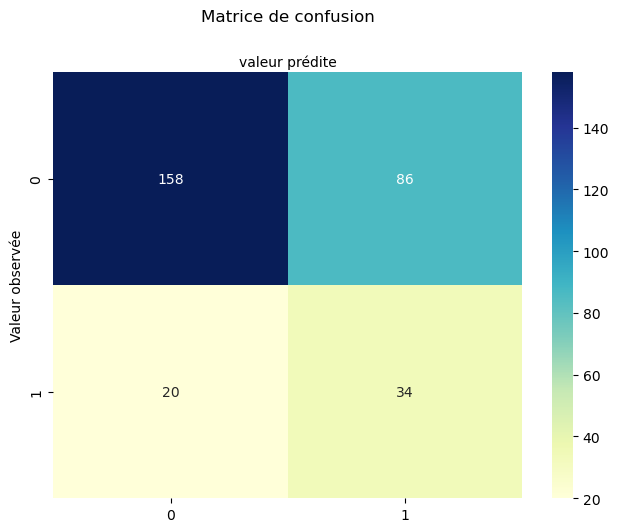

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_reg_log), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

Nous allons maintenant tracer la courbe ROC

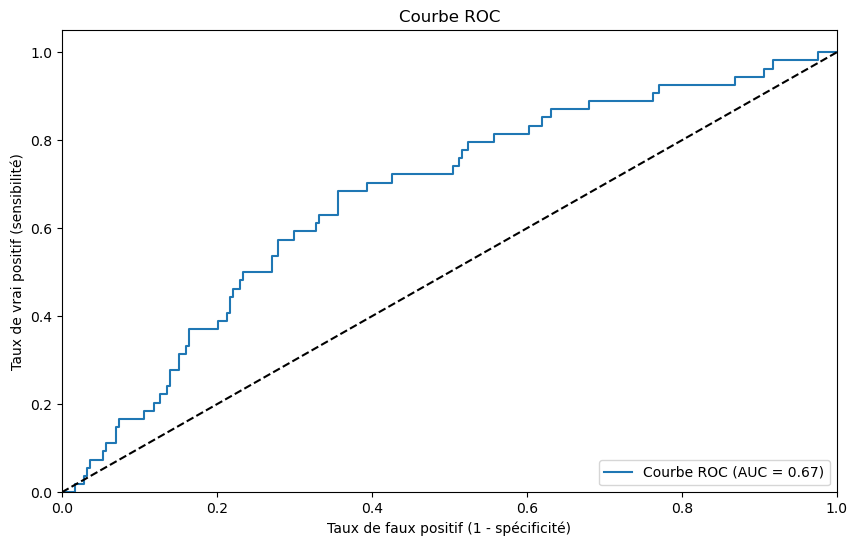

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_reg_log = modele_reg_log.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_reg_log) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

Nous allons maintenant calculer un score

In [28]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_reg_log = roc_auc_score(y_test, y_pred_prob_reg_log)
score_auc_reg_log

0.669930176077717

In [29]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_reg_log = precision_score(y_test, y_pred_reg_log)
print("Precision:", precision_reg_log)

Precision: 0.2833333333333333


In [30]:
from sklearn.metrics import recall_score

recall_reg_log = recall_score(y_test, y_pred_reg_log)
print("Recall:", recall_reg_log)

Recall: 0.6296296296296297


In [31]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_reg_log = f1_score(y_test, y_pred_reg_log)
print("F1-Score:", f1_reg_log)

F1-Score: 0.39080459770114945


Nous allons faire un résumé des métriques pour ce modèle : 

In [32]:
# Résumé du modèle de régression logistique

print("Modèle de régression logistique \n")
#print("L'accuracy est de : ", accuracy_reg_log) # pas utile pour les données déséquilibrées
#print("Score du modèle:", score_reg_log) # pas utile pour les données déséquilibrées
print("Score AUC:", score_auc_reg_log) 
#print("Precision:", precision_reg_log) # on affiche déjà le F1-score
#print("Recall:", recall_reg_log) # on affiche déjà le F1-score
print("F1-Score:", f1_reg_log)

Modèle de régression logistique 

Score AUC: 0.669930176077717
F1-Score: 0.39080459770114945


### I.2.2. Abres de décision

#### A) Construction du modèle

In [33]:
# Construction du modèle d'arbres de décision avec rééquilibrage des classes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

etapes_arbre = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier()), # Arbre de décision
        ]

modele_arbre = Pipeline(steps=etapes_arbre) # Création du pipeline

modele_arbre.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler()),
                ('arbre', DecisionTreeClassifier())])

In [71]:
y_pred_arbre = modele_arbre.predict(X_test)

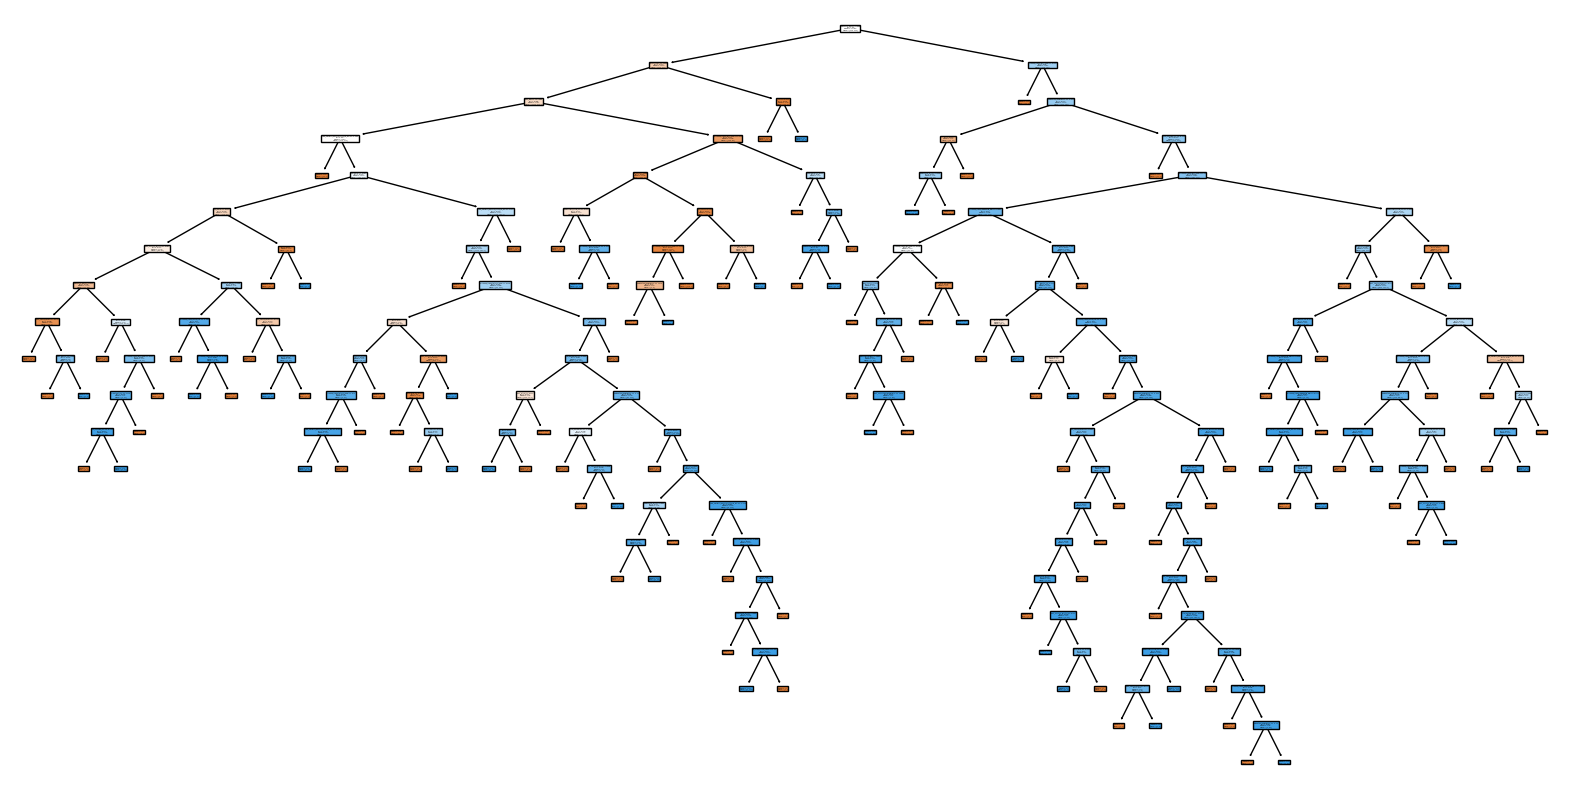

In [83]:
# Représentation graphique de l'arbre de décision

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(modele_arbre.named_steps['arbre'], filled=True, feature_names=donnees.columns)
plt.show()

#### B) Mesure de la performance

In [72]:
score_arbre = modele_arbre.score(X_test, y_test)
print("Le score du modèle est : ", score_arbre)

Le score du modèle est :  0.7080536912751678


In [73]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_arbre = confusion_matrix(y_test, y_pred_arbre)
print("La matrice de confusion est : \n", mat_conf_arbre)

La matrice de confusion est : 
 [[198  46]
 [ 41  13]]


Text(0.5, 427.9555555555555, 'valeur prédite')

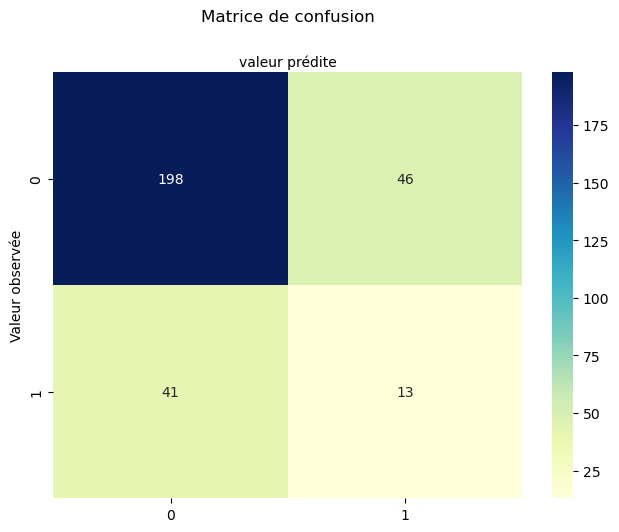

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_arbre), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

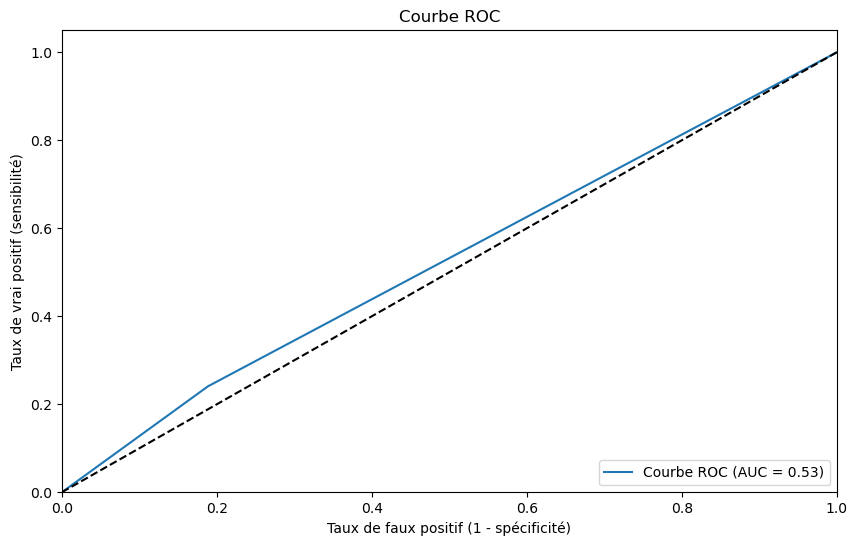

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_arbre= modele_arbre.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_arbre) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [78]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_arbre = roc_auc_score(y_test, y_pred_arbre)
score_auc_arbre

0.5261080752884032

In [77]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_arbre = precision_score(y_test, y_pred_arbre)
print("Precision:", precision_arbre)

Precision: 0.22033898305084745


In [80]:
from sklearn.metrics import recall_score

recall_arbre = recall_score(y_test, y_pred_arbre)
print("Recall:", recall_arbre)

Recall: 0.24074074074074073


In [81]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_arbre= f1_score(y_test, y_pred_arbre)
print("F1-Score:", f1_arbre)

F1-Score: 0.23008849557522124


In [82]:
# Résumé du modèle de forêts aléatoires

print("Modèle de forêts aléatoires \n")
print("Score AUC:", score_auc_arbre) 
print("F1-Score:", f1_arbre)

Modèle de forêts aléatoires 

Score AUC: 0.5261080752884032
F1-Score: 0.23008849557522124


#### C) Ajustement des hyperparamètres

In [84]:
# Ajustement des hyperparamètres de l'arbre de décision

from sklearn.model_selection import GridSearchCV

param_grid = {'arbre__max_depth': np.arange(1, 10), # profondeur maximale de l'arbre
              'arbre__min_samples_leaf': np.arange(1, 10)}  # nombre minimal d'échantillons dans une feuille

modele_arbre_cv = GridSearchCV(modele_arbre, param_grid, cv=5)

In [85]:
modele_arbre_cv.fit(X_train, y_train) # Entraînement du modèle

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('oversampler', RandomOverSampler()),
                                       ('arbre', DecisionTreeClassifier())]),
             param_grid={'arbre__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'arbre__min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [86]:
# Meilleurs hyperparamètres

print("Meilleurs hyperparamètres: ", modele_arbre_cv.best_params_)
print('\n')
print("Meilleur score: ", modele_arbre_cv.best_score_)
print("Meilleur estimateur: ", modele_arbre_cv.best_estimator_)
print("Meilleur score sur l'ensemble de test: ", modele_arbre_cv.score(X_test, y_test))

Meilleurs hyperparamètres:  {'arbre__max_depth': 9, 'arbre__min_samples_leaf': 7}
Meilleur score:  0.6902140480823552
Meilleur estimateur:  Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler()),
                ('arbre',
                 DecisionTreeClassifier(max_depth=9, min_samples_leaf=7))])
Meilleur score sur l'ensemble de test:  0.5805369127516778


In [87]:
# Prédiction avec le modèle ajusté

y_pred_arbre_cv = modele_arbre_cv.predict(X_test)

#### D) Mesure de la performance du modèle optimisé

In [90]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_arbre_cv = confusion_matrix(y_test, y_pred_arbre_cv)
print("La matrice de confusion est : \n", mat_conf_arbre_cv)

La matrice de confusion est : 
 [[146  98]
 [ 27  27]]


Text(0.5, 427.9555555555555, 'valeur prédite')

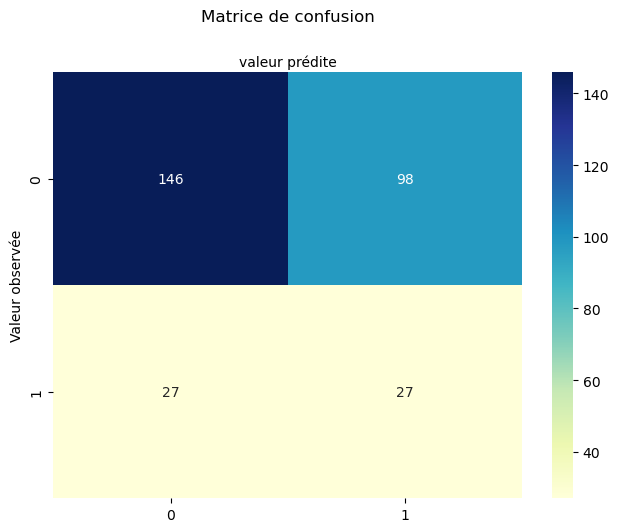

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_arbre_cv), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

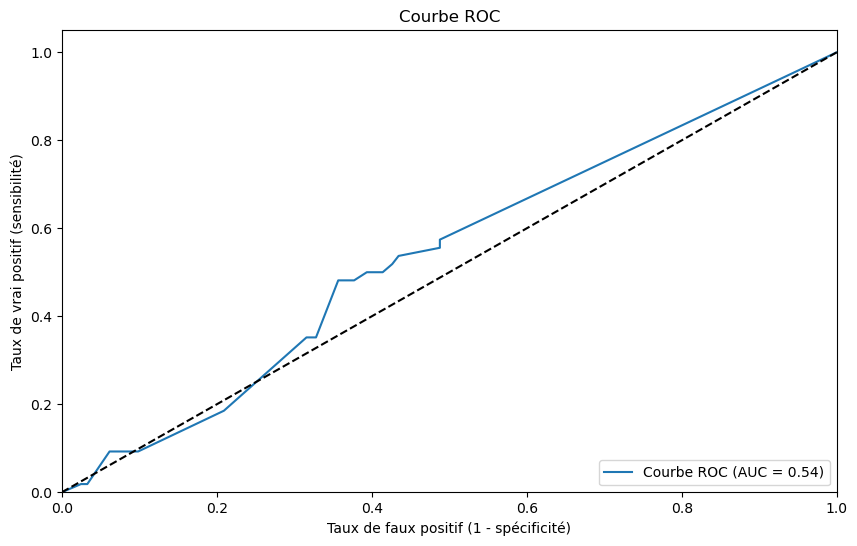

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_arbre_cv = modele_arbre_cv.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_arbre_cv) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [93]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_arbre_cv = roc_auc_score(y_test, y_pred_arbre_cv)
score_auc_arbre_cv

0.5491803278688524

In [94]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_arbre_cv = precision_score(y_test, y_pred_arbre_cv)
print("Precision:", precision_arbre_cv)

Precision: 0.216


In [95]:
from sklearn.metrics import recall_score

recall_arbre_cv = recall_score(y_test, y_pred_arbre_cv)
print("Recall:", recall_arbre_cv)

Recall: 0.5


In [96]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_arbre_cv = f1_score(y_test, y_pred_arbre_cv)
print("F1-Score:", f1_arbre_cv)

F1-Score: 0.3016759776536313


In [97]:
# Résumé du modèle de forêts aléatoires

print("Modèle de forêts aléatoires \n")
print("Score AUC:", score_auc_arbre_cv) 
print("F1-Score:", f1_arbre_cv)

Modèle de forêts aléatoires 

Score AUC: 0.5491803278688524
F1-Score: 0.3016759776536313


### I.2.3. Forêts Aléatoires 

#### A) Construction du modèle

In [34]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline

etapes = ([
    ("std_scaler", StandardScaler()),
    ("undersampler", RandomOverSampler()),
    ("clf_forets", RandomForestClassifier())
])

etapes_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('clf_forets', RandomForestClassifier()), # Forets alétaoires 
        ]

model_random_forest = Pipeline(steps=etapes_smote)

model_random_forest.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('clf_forets', RandomForestClassifier())])

In [35]:
y_pred_random_forest = model_random_forest.predict(X_test)

#### B) Mesure de la performance

In [36]:
score_random_forest = model_random_forest.score(X_test, y_test)
print("Le score du modèle est : ", score_random_forest)

Le score du modèle est :  0.7818791946308725


In [37]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_random_forest = confusion_matrix(y_test, y_pred_reg_log)
print("La matrice de confusion est : \n", mat_conf_random_forest)

La matrice de confusion est : 
 [[158  86]
 [ 20  34]]


Text(0.5, 427.9555555555555, 'valeur prédite')

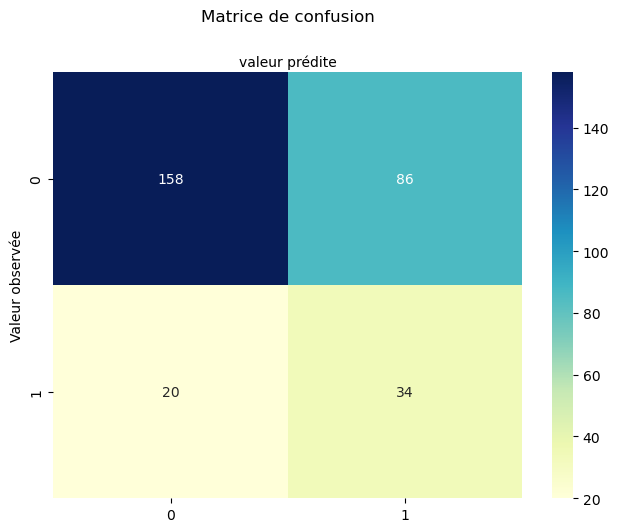

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_random_forest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

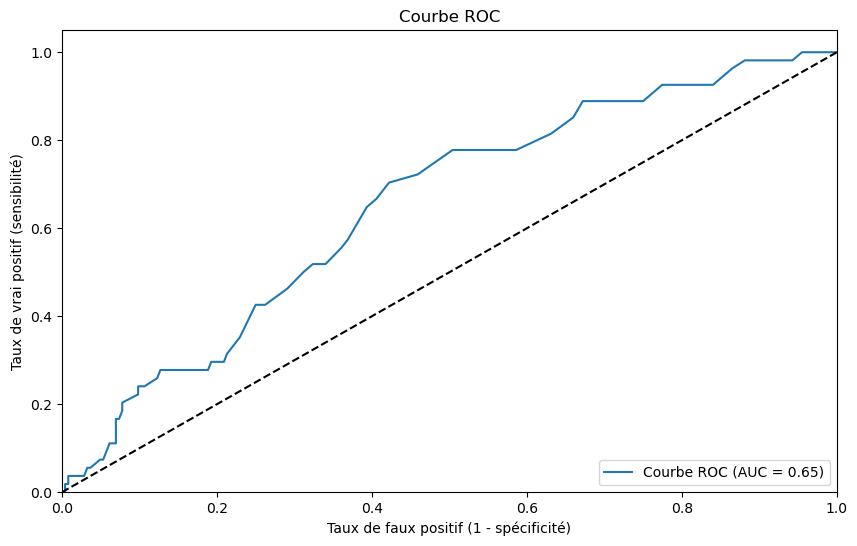

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_random_forest = model_random_forest.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_random_forest) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [40]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_random_forest = roc_auc_score(y_test, y_pred_prob_random_forest)
score_auc_random_forest

0.650728597449909

In [41]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_random_forest = precision_score(y_test, y_pred_random_forest)
print("Precision:", precision_random_forest)

Precision: 0.35135135135135137


In [76]:
from sklearn.metrics import recall_score

recall_random_forest = recall_score(y_test, y_pred_random_forest)
print("Recall:", recall_random_forest)

Recall: 0.24074074074074073


In [43]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_random_forest = f1_score(y_test, y_pred_random_forest)
print("F1-Score:", f1_reg_log)

F1-Score: 0.39080459770114945


In [44]:
# Résumé du modèle de forêts aléatoires

print("Modèle de forêts aléatoires \n")
print("Score AUC:", score_auc_random_forest) 
print("F1-Score:", f1_random_forest)

Modèle de forêts aléatoires 

Score AUC: 0.650728597449909
F1-Score: 0.2857142857142857


### I.2.4. Gradient Boosting

#### A) Construction du modèle

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

# Modèle de gradient boosting
etapes = ([("std_scaler", StandardScaler()),
              ("smote", SMOTE()),
              ("clf_boosting", GradientBoostingClassifier())
    ])

model_gradient_boosting = Pipeline(steps=etapes)

In [46]:
model_gradient_boosting.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('clf_boosting', GradientBoostingClassifier())])

In [47]:
y_pred_gradient_boosting = model_gradient_boosting.predict(X_test)

#### B) Mesure de la performance

In [48]:
score_gradient_boosting = modele_reg_log.score(X_test, y_test)
print("Le score du modèle est : ", score_gradient_boosting)

Le score du modèle est :  0.6442953020134228


In [49]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)
print("La matrice de confusion est : \n", mat_conf_gradient_boosting)

La matrice de confusion est : 
 [[213  31]
 [ 41  13]]


Text(0.5, 427.9555555555555, 'valeur prédite')

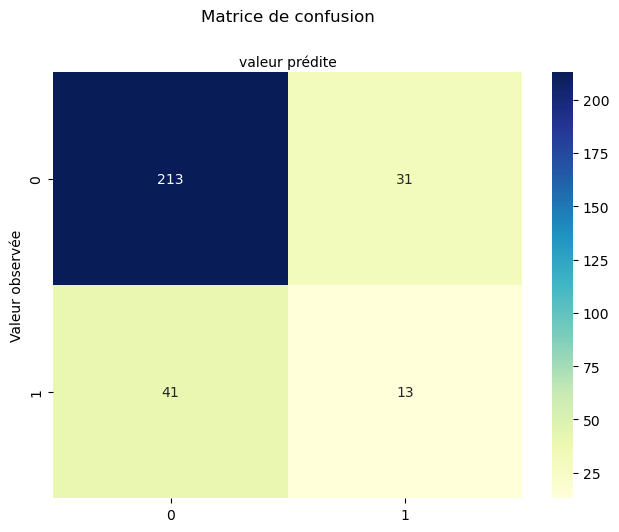

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_gradient_boosting), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

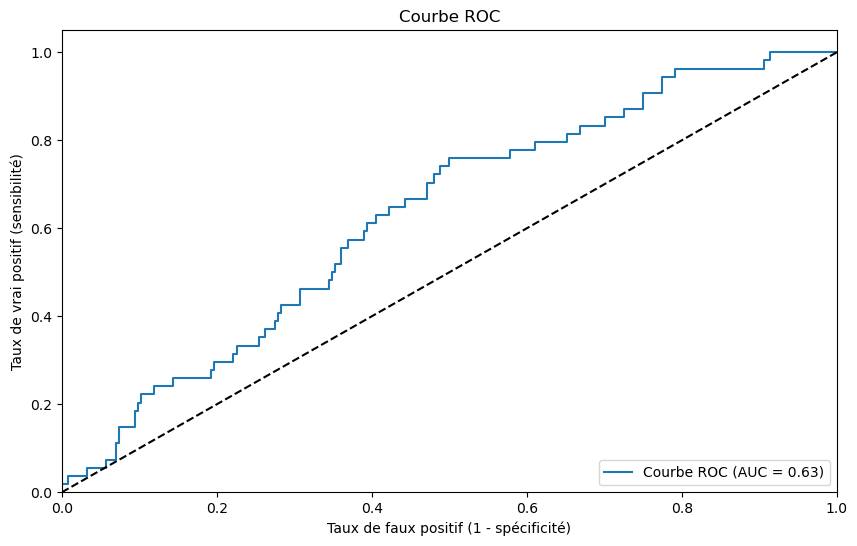

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_gradient_boosting = model_gradient_boosting.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gradient_boosting) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [52]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_gradient_boosting = roc_auc_score(y_test, y_pred_prob_gradient_boosting)
score_auc_gradient_boosting

0.6290224650880389

In [53]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_gradient_boosting = precision_score(y_test, y_pred_gradient_boosting)
print("Precision:", precision_gradient_boosting)

Precision: 0.29545454545454547


In [54]:
from sklearn.metrics import recall_score

recall_gradient_boosting = recall_score(y_test, y_pred_gradient_boosting)
print("Recall:", recall_gradient_boosting)

Recall: 0.24074074074074073


In [55]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_gradient_boosting = f1_score(y_test, y_pred_gradient_boosting)
print("F1-Score:", f1_gradient_boosting)

F1-Score: 0.2653061224489796


In [56]:
# Résumé du modèle de gradient boosting

print("Modèle de gradient boosting \n")
print("Score AUC:", score_auc_gradient_boosting) 
print("F1-Score:", f1_gradient_boosting)

Modèle de gradient boosting 

Score AUC: 0.6290224650880389
F1-Score: 0.2653061224489796


### I.2.5. Régression ridge

#### A) Construction du modèle

In [57]:
# Régression ridge

from sklearn.linear_model import RidgeClassifier

etapes = ([
    ("std_scaler", StandardScaler()),
    ("smote", SMOTE()),
    ("clf_ridge", RidgeClassifier())
])

model_reg_ridge = Pipeline(steps=etapes)

In [58]:
model_reg_ridge.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('clf_ridge', RidgeClassifier())])

In [59]:
y_pred_reg_ridge = model_reg_ridge.predict(X_test)

#### B) Mesure de la performance

In [60]:
score_reg_ridge = modele_reg_log.score(X_test, y_test)
print("Le score du modèle est : ", score_reg_ridge)

Le score du modèle est :  0.6442953020134228


In [61]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_reg_ridge = confusion_matrix(y_test, y_pred_reg_ridge)
print("La matrice de confusion est : \n", mat_conf_reg_ridge)

La matrice de confusion est : 
 [[161  83]
 [ 19  35]]


Text(0.5, 427.9555555555555, 'valeur prédite')

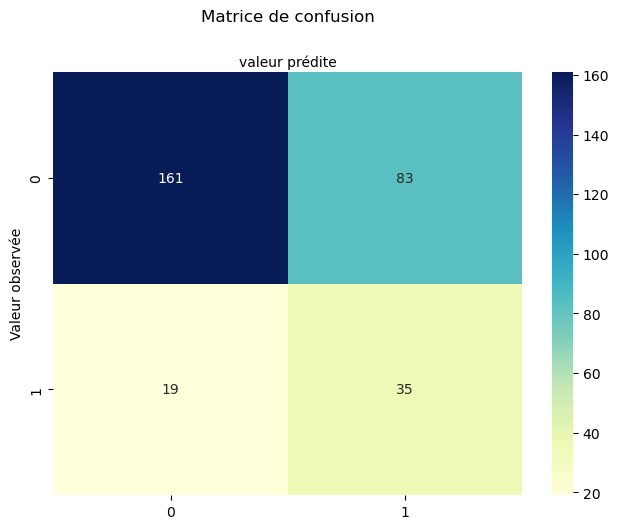

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_reg_ridge), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

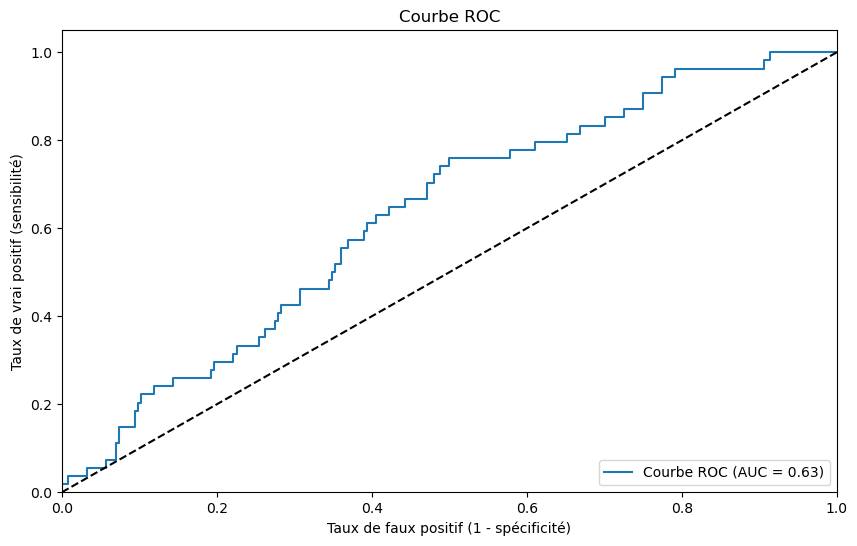

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_reg_ridge = model_gradient_boosting.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_reg_ridge) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [64]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_reg_ridge = roc_auc_score(y_test, y_pred_prob_reg_ridge)
score_auc_reg_ridge

0.6290224650880389

In [65]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_reg_ridge = precision_score(y_test, y_pred_reg_ridge)
print("Precision:", precision_reg_ridge)

Precision: 0.2966101694915254


In [66]:
from sklearn.metrics import recall_score

recall_reg_ridge = recall_score(y_test, y_pred_reg_ridge)
print("Recall:", recall_reg_ridge)

Recall: 0.6481481481481481


In [67]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_reg_ridge = f1_score(y_test, y_pred_reg_ridge)
print("F1-Score:", f1_reg_ridge)

F1-Score: 0.4069767441860465


In [68]:
# Résumé du modèle de gradient boosting

print("Modèle de gradient boosting \n")
print("Score AUC:", score_auc_reg_ridge) 
print("F1-Score:", f1_reg_ridge)

Modèle de gradient boosting 

Score AUC: 0.6290224650880389
F1-Score: 0.4069767441860465


## I.3. Comparaison des modèles

In [69]:
# Comparaison des modèles

print("Régression logistique \n")
print("Score AUC:", score_auc_reg_log)
print("F1-Score:", f1_reg_log)

print("Forêts aléatoires \n")
print("Score AUC:", score_auc_random_forest)
print("F1-Score:", f1_random_forest)

print("Gradient boosting \n")
print("Score AUC:", score_auc_gradient_boosting)
print("F1-Score:", f1_gradient_boosting)

print("Régression ridge \n")
print("Score AUC:", score_auc_reg_ridge)
print("F1-Score:", f1_reg_ridge)

Régression logistique 

Score AUC: 0.669930176077717
F1-Score: 0.39080459770114945
Forêts aléatoires 

Score AUC: 0.650728597449909
F1-Score: 0.2857142857142857
Gradient boosting 

Score AUC: 0.6290224650880389
F1-Score: 0.2653061224489796
Régression ridge 

Score AUC: 0.6290224650880389
F1-Score: 0.4069767441860465
